In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn
import torch.nn.functional as F

In [3]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [4]:
# PARAMETERS:
n = 100
input_size = 2
hidden_size = 4
num_classes = 2
num_epochs = 5
batch_size = 1
learning_rate = 0.1

In [5]:
from load_linearData import getLinearDataLoader
#from LinearModel import run_model
from StochasticBinaryModel import run_model

train_data, test_data, train, test = \
    getLinearDataLoader(n=n, d=num_classes, sigma = 0.15, test_split = 0.2, batch_size = batch_size, num_workers = 1)
    
run_model(input_size = input_size,hidden_size=hidden_size, num_classes=num_classes, num_epochs=num_epochs,
    batch_size=batch_size, learning_rate=learning_rate, n=n,
    train_loader=train,
    test_loader=test)

Epoch [1/5], Step [10/160], Loss: 2.0000
Epoch [1/5], Step [20/160], Loss: 1.0000
Epoch [1/5], Step [30/160], Loss: 2.0000
Epoch [1/5], Step [40/160], Loss: 2.0000
Epoch [1/5], Step [50/160], Loss: 1.0000
Epoch [1/5], Step [60/160], Loss: 2.0000
Epoch [1/5], Step [70/160], Loss: 1.0000
Epoch [1/5], Step [80/160], Loss: 0.0000
Epoch [1/5], Step [90/160], Loss: 0.0000
Epoch [1/5], Step [100/160], Loss: 2.0000
Epoch [1/5], Step [110/160], Loss: 1.0000
Epoch [1/5], Step [120/160], Loss: 1.0000
Epoch [1/5], Step [130/160], Loss: 1.0000
Epoch [1/5], Step [140/160], Loss: 1.0000
Epoch [1/5], Step [150/160], Loss: 0.0000
Epoch [1/5], Step [160/160], Loss: 0.0000
Epoch [2/5], Step [10/160], Loss: 0.0000
Epoch [2/5], Step [20/160], Loss: 0.0000
Epoch [2/5], Step [30/160], Loss: 0.0000
Epoch [2/5], Step [40/160], Loss: 0.0000
Epoch [2/5], Step [50/160], Loss: 0.0000
Epoch [2/5], Step [60/160], Loss: 0.0000
Epoch [2/5], Step [70/160], Loss: 0.0000
Epoch [2/5], Step [80/160], Loss: 0.0000
Epoch [2/

In [6]:
#from LinearModel import LinearNet
from StochasticBinaryModel import StochasticBinaryModel
#load the model back
#torch.load_state_dict('model.ckpt', LinearNet(2,2,2))
#model = LinearNet(input_size, hidden_size, num_classes)
model = StochasticBinaryModel(input_size, hidden_size, num_classes)
state_dict = torch.load('/home/bjk224/BSNN/linear_data/model.ckpt')
model.load_state_dict(state_dict)

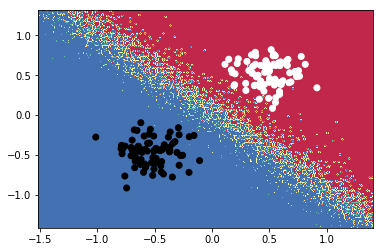

In [7]:
%matplotlib inline
def plot_decision_boundary(pred_func,X,y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)
plot_decision_boundary(model.predict, train_data.inputs, train_data.labels)

In [8]:
sig = torch.sigmoid(torch.Tensor([2]))
print(sig)
torch.bernoulli(sig)

tensor([0.8808])


tensor([1.])

In [9]:
crit = nn.NLLLoss()
print(crit(torch.Tensor([[1.,0.]]), torch.Tensor([0]).long()))
print(crit(torch.Tensor([[0.,1.]]), torch.Tensor([0]).long()))
print(crit(torch.Tensor([[1.,0.]]), torch.Tensor([1]).long()))
print(crit(torch.Tensor([[0.,1.]]), torch.Tensor([1]).long()))
print()
print(crit(torch.Tensor([[0.,0.]]), torch.Tensor([0]).long()))
print(crit(torch.Tensor([[1.,1.]]), torch.Tensor([0]).long()))
print(crit(torch.Tensor([[0.,0.]]), torch.Tensor([1]).long()))
print(crit(torch.Tensor([[1.,1.]]), torch.Tensor([1]).long()))

#tensor(0.3133)
#tensor(1.3133)
#tensor(1.3133)
#tensor(0.3133)

#tensor(0.6931)
#tensor(0.6931)
#tensor(0.6931)
#tensor(0.6931)

tensor(-1.)
tensor(0.)
tensor(0.)
tensor(-1.)

tensor(0.)
tensor(-1.)
tensor(0.)
tensor(-1.)


In [10]:
crit = lambda outputs, labels: torch.sum((outputs - labels.float())**2)
print(crit(torch.Tensor([[1.,0.]]), torch.Tensor([[1,0]]).long()))
print(crit(torch.Tensor([[0.,1.]]), torch.Tensor([[1,0]]).long()))
print(crit(torch.Tensor([[1.,0.]]), torch.Tensor([[0,1]]).long()))
print(crit(torch.Tensor([[0.,1.]]), torch.Tensor([[0,1]]).long()))
print()
print(crit(torch.Tensor([[0.,0.]]), torch.Tensor([[1,0]]).long()))
print(crit(torch.Tensor([[1.,1.]]), torch.Tensor([[1,0]]).long()))
print(crit(torch.Tensor([[0.,0.]]), torch.Tensor([[0,1]]).long()))
print(crit(torch.Tensor([[1.,1.]]), torch.Tensor([[0,1]]).long()))

tensor(0.)
tensor(2.)
tensor(2.)
tensor(0.)

tensor(1.)
tensor(1.)
tensor(1.)
tensor(1.)


In [11]:
batch_size = 1
nb_digits = 2
# Dummy input that HAS to be 2D for the scatter (you can use view(-1,1) if needed)
y = torch.LongTensor(batch_size,1).random_() % nb_digits
# One hot encoding buffer that you create out of the loop and just keep reusing
y_onehot = torch.FloatTensor(batch_size, nb_digits)

# In your for loop
y_onehot.zero_()
y_onehot.scatter_(1, y, 1)

print(y)
print(y_onehot)

tensor([[0]])
tensor([[1., 0.]])
